# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [23]:
from scipy.optimize import differential_evolution

import matplotlib.pyplot as plt
import numpy as np

In [7]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

In [8]:
bounds = [(-5, 5), (-5, 5)]

In [9]:
result = differential_evolution(ackley, bounds)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3033
     nit: 98
 success: True
       x: array([0., 0.])

In [10]:
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp',
              'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

In [11]:
# Здесь и далее придерживаюсь следующей логики. Выполняю функцию со всеми возможными значениями параметра.
# Сохраняю в разные списки корректные результаты и ошибки
# (оптимальный вектор известен заранее, так что просто сравниваю с ним то, что получилось)
results = []
errors = []
for st in strategies:
    result = differential_evolution(ackley, bounds, strategy=st)
    if all(result['x'] == np.array([0., 0.])):
        results.append((st, result['nit']))
    else:
        errors.append((st, result['nit']))

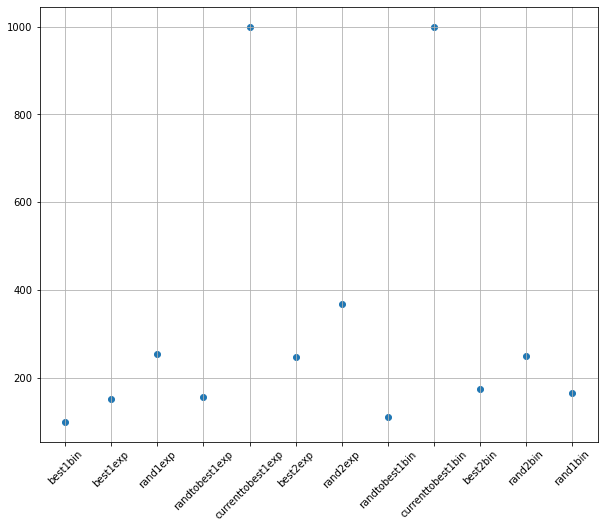

In [13]:
# Отображаю на графике корректные значения и ошибки в зависимости от количества итераций.
# В данном случае оптимальным методом оказался best1bin. Ошибок не было.
plt.figure(figsize = (10, 8))
plt.subplot()
plt.scatter([x[0] for x in results], [x[1] for x in results])
plt.scatter([x[0] for x in errors], [x[1] for x in errors])
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [14]:
# Для параметра popsize ограничилась 30 значениями, потому что иначе цикл отрабатывает слишком медленно.
results = []
errors = []
for i in range(1, 30):
    result = differential_evolution(ackley, bounds, popsize = i)
    if all(result['x'] == np.array([0., 0.])):
        results.append((i, result['nit']))
    else:
        errors.append((i, result['nit']))

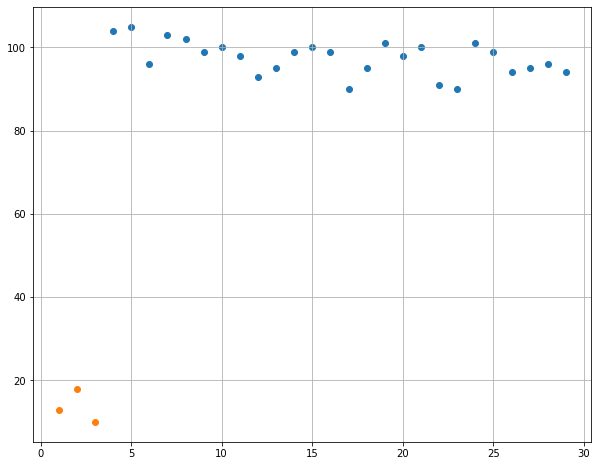

In [15]:
# При значениях параметра popsize 1-3 алгоритм отработал с ошибками.
# При более высоких значениях количество итераций оставалось примерно на одном уровне, минимум - при popsize=17.
plt.figure(figsize = (10, 8))
plt.subplot()
plt.scatter([x[0] for x in results], [x[1] for x in results])
plt.scatter([x[0] for x in errors], [x[1] for x in errors])
plt.grid()
plt.show()

In [18]:
# Опытным путем я установила, что алгоритм отрабатывает более-менее стабильно при tol [0, 0.1].
# 100 - это предельное значение, при котором цикл работает за разумное время.
results = []
errors = []
for i in np.linspace(0, .1, 100):
    result = differential_evolution(ackley, bounds, tol = i)
    if all(result['x'] == np.array([0., 0.])):
        results.append((i, result['nit']))
    else:
        errors.append((i, result['nit']))

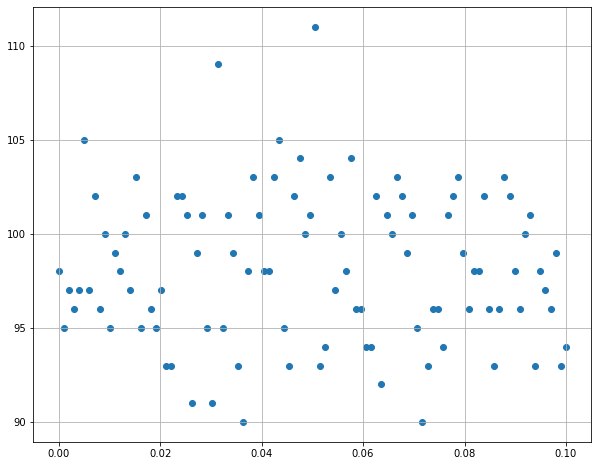

In [19]:
# Алгоритм во всех случаях отработал без ошибок.
# Количество итераций в рассматриваемом диапазоне значений значительно не менялось (90-112).
plt.figure(figsize = (10, 8))
plt.subplot()
plt.scatter([x[0] for x in results], [x[1] for x in results])
plt.grid()
plt.show()

In [20]:
# Диапазон значений для mutation задан параметрами функции и равен [0, 2).
results = []
errors = []
for i in np.linspace(0, 1.999, 100):
    result = differential_evolution(ackley, bounds, mutation = i)
    if all(result['x'] == np.array([0., 0.])):
        results.append((i, result['nit']))
    else:
        errors.append((i, result['nit']))

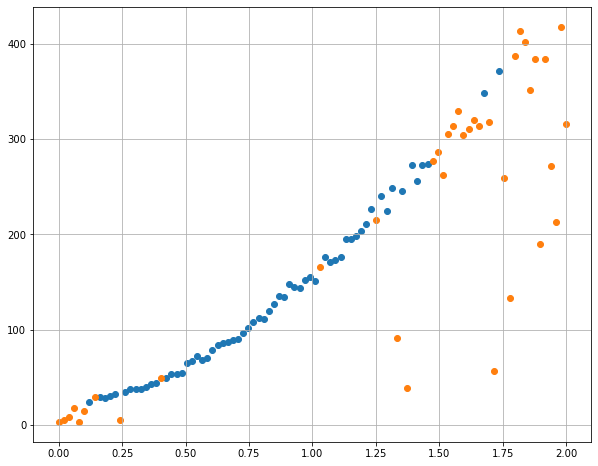

In [21]:
# Получилась практически линейная зависимость количества итераций от параметра mutation.
# При этом в начале и в конце диапазона значений вырастает количество ошибок.
plt.figure(figsize = (10, 8))
plt.subplot()
plt.scatter([x[0] for x in results], [x[1] for x in results])
plt.scatter([x[0] for x in errors], [x[1] for x in errors])
plt.grid()
plt.show()

In [22]:
# Попробовала задать mutation кортежем с максимальным и минимальным значением.
results = []
errors = []
for i in np.linspace(0, 1.999, 100):
    result = differential_evolution(ackley, bounds, mutation = (i, 1.999))
    if all(result['x'] == np.array([0., 0.])):
        results.append((i, result['nit']))
    else:
        errors.append((i, result['nit']))

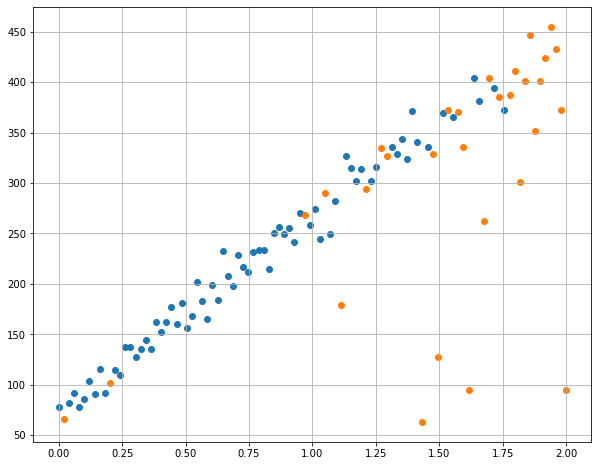

In [23]:
# График очень похож на предыдущий, поэтому дальше экспериментировать с mutation не стала.
plt.figure(figsize = (10, 8))
plt.subplot()
plt.scatter([x[0] for x in results], [x[1] for x in results])
plt.scatter([x[0] for x in errors], [x[1] for x in errors])
plt.grid()
plt.show()

In [21]:
# У recombination диапазон [0, 1]
results = []
errors = []
for i in np.linspace(0, 1, 100):
    result = differential_evolution(ackley, bounds, recombination = i)
    if all(result['x'] == np.array([0., 0.])):
        results.append((i, result['nit']))
    else:
        errors.append((i, result['nit']))

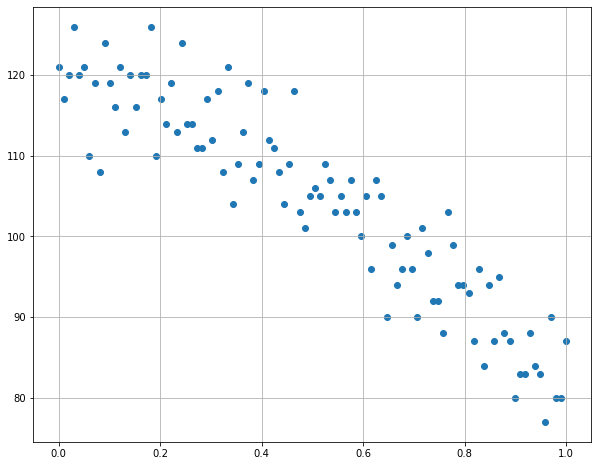

In [24]:
# Прослеживается обратная линейная зависимость количества итераций от recombination. Параметр надо максимизировать.
plt.figure(figsize = (10, 8))
plt.subplot()
plt.scatter([x[0] for x in results], [x[1] for x in results])
plt.scatter([x[0] for x in errors], [x[1] for x in errors])
plt.grid()
plt.show()

In [26]:
# updating
results = []
errors = []
for i in ['immediate', 'deferred']:
    result = differential_evolution(ackley, bounds, updating = i)
    if all(result['x'] == np.array([0., 0.])):
        results.append((i, result['nit']))
    else:
        errors.append((i, result['nit']))

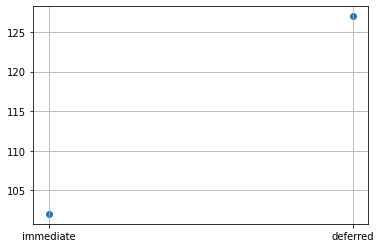

In [27]:
# Здесь всего два значения, но график тем не менее я по инерции построила.
# При updating=immediate количество итераций гораздо ниже, чем при updating=deferred
plt.subplot()
plt.scatter([x[0] for x in results], [x[1] for x in results])
plt.scatter([x[0] for x in errors], [x[1] for x in errors])
plt.grid()
plt.show()

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [13]:
# Чтобы получить минимальное количество итераций, мне нужна новая функция,
# которая считает количество итераций в работе функции differential_evolution.
# Функция array-to-params получает на вход вектор и разбирает его на параметры differential_evolution.
def array_to_params(x):
    pd = dict()
    strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp',
                  'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
    updating = ['immediate', 'deferred']
    pd['strategy'] = strategy[round(x[0]) % 12]
    pd['popsize'] = round(x[1])
    pd['tol'] = x[2]
    pd['mutation'] = x[3] % 2
    if round(x[4]) % 2 != 0 and x[4] % 1 == 0:
        pd['recombination'] = 1
    else:
        pd['recombination'] = x[4] % 1
    pd['updating'] = updating[round(x[5]) % 2]
    
    return pd

In [14]:
# Собственно функция подсчета итераций. При неправильном результате возвращает 10000 - чтобы там точно не оказалось минимума.
def count_iterations(x):
    pd = array_to_params(x)
    
    results = differential_evolution(ackley, bounds, seed=42, strategy = pd['strategy'], popsize = pd['popsize'],
                                     tol = pd['tol'], mutation = pd['mutation'],
                                    recombination = pd['recombination'], updating = pd['updating'])
    
    if all(results['x'] == np.array([0., 0.])) and results['success']:
        return results['nit']
    else:
        return 10000

In [19]:
# Теперь передаю функцию count_iterations и случайный вектор функции basinhopping.
# Отрабатывает долго, но я верю, что это время меньше, чем я получила бы перебором вариантов.
x = [5, 10, 0.1, 0.75, 1, 0]
res = basinhopping(count_iterations, x, niter=20, minimizer_kwargs = {'method': 'Nelder-Mead'})
res

                        fun: 25.0
 lowest_optimization_result:  final_simplex: (array([[4.57282376, 9.92409132, 0.11248501, 0.21650584, 1.99921984,
        0.39721538],
       [4.57282376, 9.92409132, 0.11248501, 0.21650584, 1.99921984,
        0.39721538],
       [4.57282376, 9.92409132, 0.11248501, 0.21650584, 1.99921984,
        0.39721538],
       [4.57282376, 9.92409132, 0.11248501, 0.21650584, 1.99921984,
        0.39721538],
       [4.57282376, 9.92409132, 0.11248501, 0.21650584, 1.99921984,
        0.39721538],
       [4.57282376, 9.92409132, 0.11248501, 0.21650584, 1.99921984,
        0.39721538],
       [4.57282376, 9.92409132, 0.11248501, 0.21650584, 1.99921984,
        0.39721538]]), array([25., 25., 25., 25., 25., 25., 25.]))
           fun: 25.0
       message: 'Optimization terminated successfully.'
          nfev: 493
           nit: 144
        status: 0
       success: True
             x: array([4.57282376, 9.92409132, 0.11248501, 0.21650584, 1.99921984,
       0.397

In [26]:
# Разбираю получившийся вектор на параметры differential_evolution.
params = array_to_params(res['x'])
params

{'strategy': 'best2exp',
 'popsize': 10,
 'tol': 0.11248501195425326,
 'mutation': 0.21650584141628954,
 'recombination': 0.9992198364260108,
 'updating': 'immediate'}

In [27]:
# Проверяю работу функции
check = differential_evolution(ackley, bounds, seed=42, strategy = 'best2exp', popsize=10, tol = params['tol'],
                              mutation = params['mutation'], recombination = params['recombination'], updating = 'immediate')
check

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 583
     nit: 25
 success: True
       x: array([0., 0.])

По сравнению с первой частью задания количество итераций очень сильно сократилось. Там были результаты не ниже 80-90, здесь - 25.

Оптимальной стратегией оказалась не дефолтная best1bin, а best2exp, у которой был не минимальный результат в первой части. При этом оправдались ожидания от mutation (значение минимальное, но выше .2), recombination (значение близкое к максимальному) и updating (immediate).